In [39]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [41]:
tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
tsla.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17884\3482032691.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [42]:
#Add columns
def column_add(df)->pd.DataFrame:
    df['Returns'] = df['Close'].pct_change()
    df['LogReturns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['Volatility20'] = df['Returns'].rolling(window=20).std()
    df['Volatility'] = df['Volatility20']* np.sqrt(252)  #Annualized Volatility
    return df

In [43]:
column_add(tsla)
tsla.head()

Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,
Date,,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,-0.042041,-0.042950,NaN,NaN,NaN,NaN
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,0.005664,0.005648,NaN,NaN,NaN,NaN
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,-0.001562,-0.001563,NaN,NaN,NaN,NaN
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,-0.001564,-0.001566,NaN,NaN,NaN,NaN


In [44]:
print(tsla.shape[0])

2733


In [45]:
tsla = tsla.dropna(how='all').asfreq('B').ffill()

In [46]:
print(tsla.shape[0])

2834


In [47]:
###나머지 관련주 - EV Sector
#1. Nio Inc. (NIO)
nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
column_add(nio)

#2. ChargePoint Holdings
chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
column_add(chpt)
#3. Volkswagen AG
vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
column_add(vwagy)

#6. TM(Toyota Motor)
tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
column_add(tm)

C:\Users\USER\AppData\Local\Temp\ipykernel_17884\4120073332.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


C:\Users\USER\AppData\Local\Temp\ipykernel_17884\4120073332.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_17884\4120073332.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_17884\4120073332.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,TM,TM,TM,TM,TM,,,,,,
Date,,,,,,,,,,,
2015-01-02,93.269127,93.989038,92.690231,93.684749,250000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,91.562134,92.482429,91.324638,92.356261,240600,-0.018302,-0.018471,NaN,NaN,NaN,NaN
2015-01-06,90.619553,91.821878,89.959017,91.584382,285600,-0.010294,-0.010348,NaN,NaN,NaN,NaN
2015-01-07,92.898033,93.558568,92.816393,93.157793,385700,0.025143,0.024832,NaN,NaN,NaN,NaN
2015-01-08,94.686691,94.775749,93.848030,93.848030,498800,0.019254,0.019071,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,202.940002,204.199997,201.500000,203.990005,379500,0.019031,0.018852,200.903001,198.467667,0.015579,0.247303
2025-11-07,201.979996,202.960007,201.279999,202.520004,340500,-0.004730,-0.004742,201.741000,198.626001,0.012637,0.200605


In [ ]:
# byd: BYD Company
byd = yf.download("1211.HK", start="2015-01-01", end="2025-11-13")
column_add(byd)
byd.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17884\1047355673.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  byd = yf.download("1211.HK", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,1211.HK,1211.HK,1211.HK,1211.HK,1211.HK,,,,,,
Date,,,,,,,,,,,
2015-01-02,10.021317,10.037100,9.547869,9.737248,24822066,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,10.021317,10.116007,9.800376,10.052880,34120002,0.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-06,10.068661,10.100223,9.863499,10.021316,17734590,0.004724,0.004713,NaN,NaN,NaN,NaN
2015-01-07,9.216455,10.037099,9.090203,10.037099,39908772,-0.084639,-0.088437,NaN,NaN,NaN,NaN
2015-01-08,9.326926,9.547868,9.279581,9.374270,19330665,0.011986,0.011915,NaN,NaN,NaN,NaN


In [49]:
nio.shape[0]

1803

In [50]:
##영업일 기준(5일) resampling
nio = nio.dropna(how='all').asfreq('B').ffill()
nio.shape[0]

1871

In [51]:
##영업일 기준(5일) resampling
chpt = chpt.dropna(how='all').asfreq('B').ffill()
print(f"chpt shape: {chpt.shape[0]}")

vwagy = vwagy.dropna(how='all').asfreq('B').ffill()
print(f"vwagy shape: {vwagy.shape[0]}")

tm = tm.dropna(how='all').asfreq('B').ffill()
print(f"tm shape: {tm.shape[0]}")

byd = byd.dropna(how='all').asfreq('B').ffill()
print(f"byd shape: {byd.shape[0]}")

chpt shape: 1608
vwagy shape: 2834
tm shape: 2834
byd shape: 2834


In [52]:
### Intersection of Dates
def align_dates(df1, name1, df2=tsla, name2='tsla'):
    # 필요한 컬럼만 추출하고 common dates로 inner join
    a = df1[['Returns','LogReturns']].dropna()
    b = df2[['Returns','LogReturns']].dropna()#tsla
    df_merged = pd.concat([a, b], axis=1, join='inner', keys=[name1, name2])
    df_merged.columns = [f'{name1}_Returns', f'{name1}_LogReturns', f'{name2}_Returns', f'{name2}_LogReturns']
    return df_merged

In [53]:
### 필요한 분석
#1. daily return, log return plot
#2. 
def plot_return(df_merged,name1,name2='tsla',return_type='returns'):
    if return_type.lower() == 'returns':
        i = 0
        s='Returns'
    else:
        i = 1
        s = 'LogReturns'
    plt.figure(figsize=(14,7))
    # 비교 stock
    plt.plot(df_merged.iloc[:,i], label=f'{name1}', color='blue', alpha=0.5)
    # tsla
    plt.plot(df_merged.iloc[:,i+2], label=f'{name2}', color='orange', alpha=0.5)
    plt.title(f'Daily {s}: {name1} vs {name2}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

In [54]:
related = {}
stock_tickers = ['nio','chpt','vwagy','tm','byd']

for name in stock_tickers:
    df = globals().get(name)
    if df is None:
        print(f"{name} not found")
        related[name] = None
    else:
        related[name] = df if not df.empty else None

# 확인
for k, v in related.items():
    print(k, '->', 'empty' if v is None else f'df shape {v.shape}')


nio -> df shape (1871, 11)
chpt -> df shape (1608, 11)
vwagy -> df shape (2834, 11)
tm -> df shape (2834, 11)
byd -> df shape (2834, 11)


In [55]:
merged_df = {}
for name, df in related.items():
    merged = align_dates(df1=df, name1=name)
    merged_df[f'{name}_tsla'] = merged
    print(f"Merged {name} with tsla: shape {merged.shape}")   

#check
for k, v in merged_df.items():
    print(k, '->', 'empty' if v is None else f'df shape {v.shape}')

Merged nio with tsla: shape (1870, 4)
Merged chpt with tsla: shape (1607, 4)
Merged vwagy with tsla: shape (2833, 4)
Merged tm with tsla: shape (2833, 4)
Merged byd with tsla: shape (2833, 4)
nio_tsla -> df shape (1870, 4)
chpt_tsla -> df shape (1607, 4)
vwagy_tsla -> df shape (2833, 4)
tm_tsla -> df shape (2833, 4)
byd_tsla -> df shape (2833, 4)


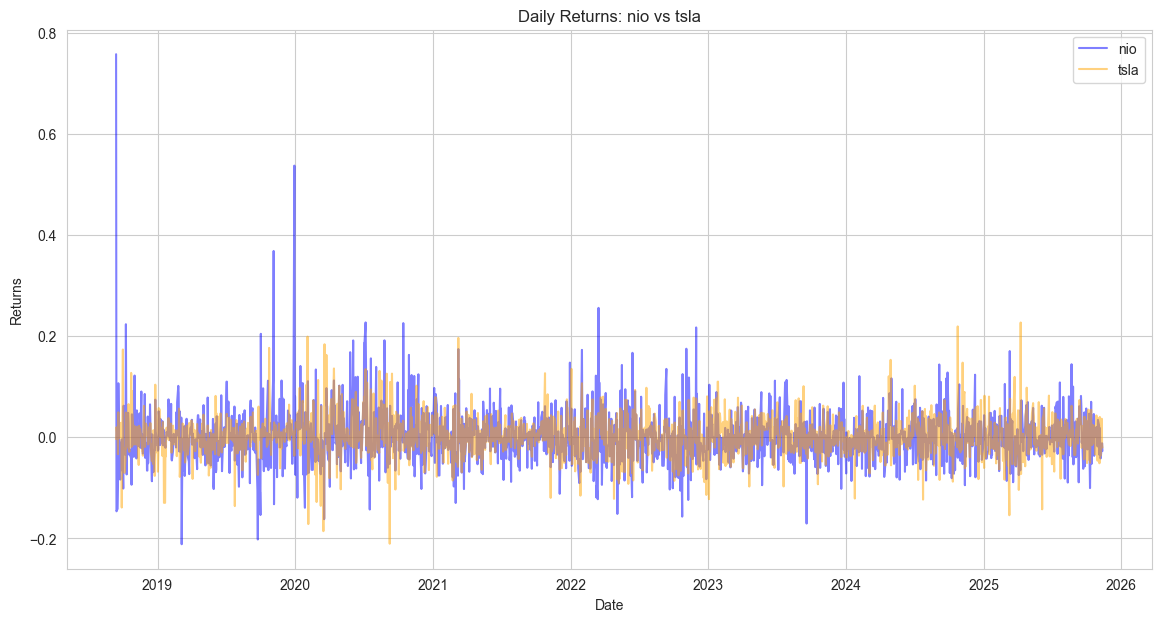

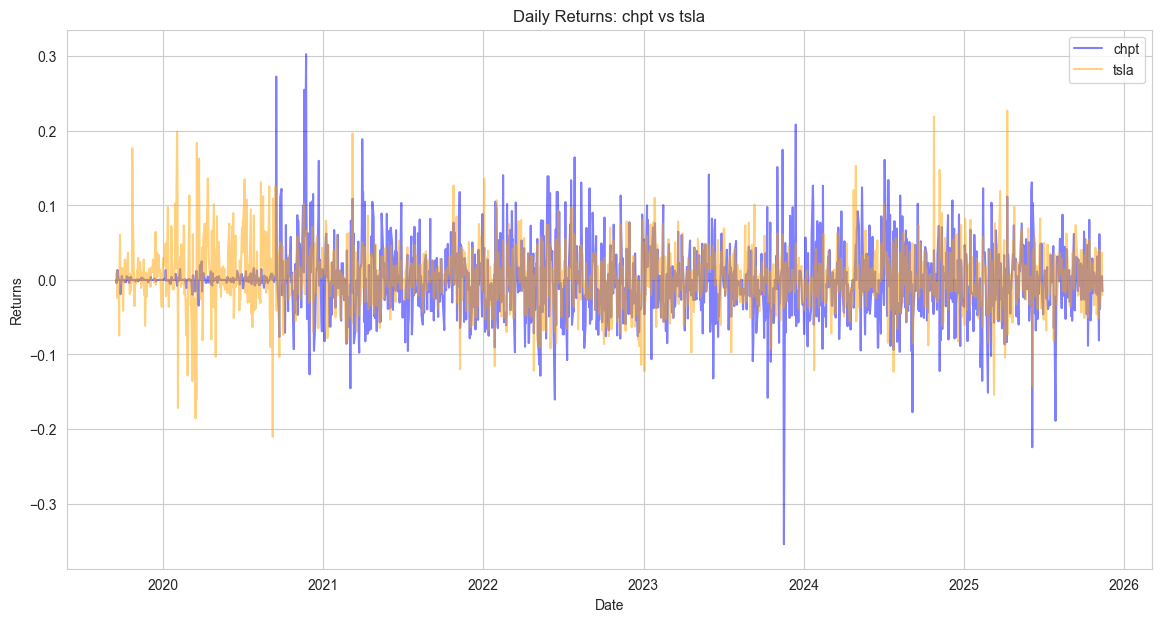

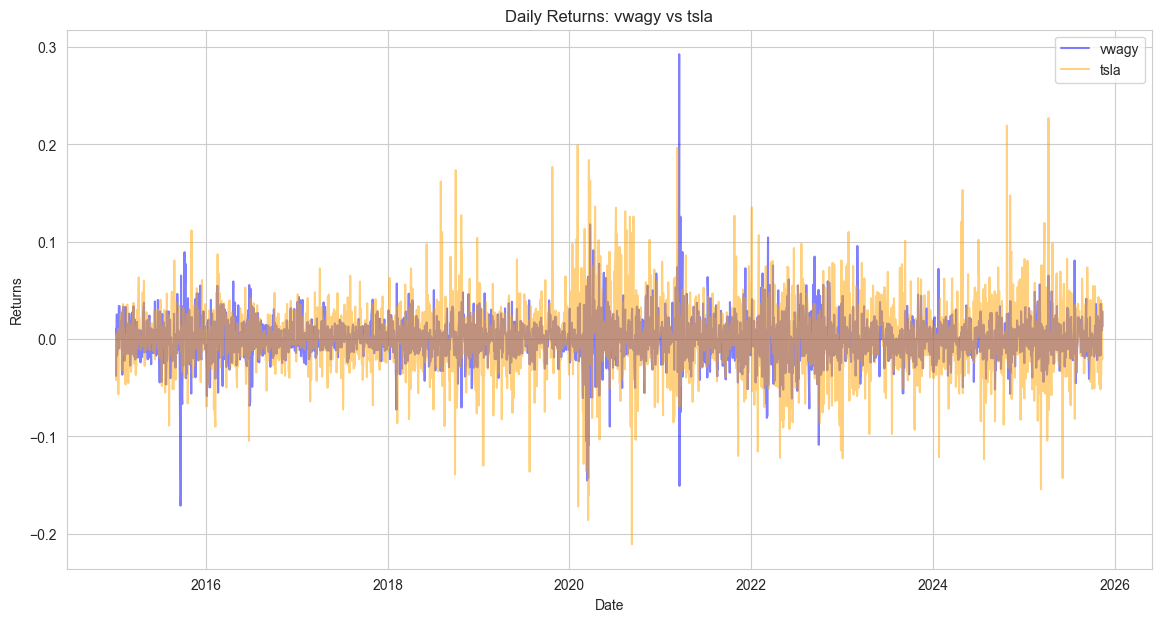

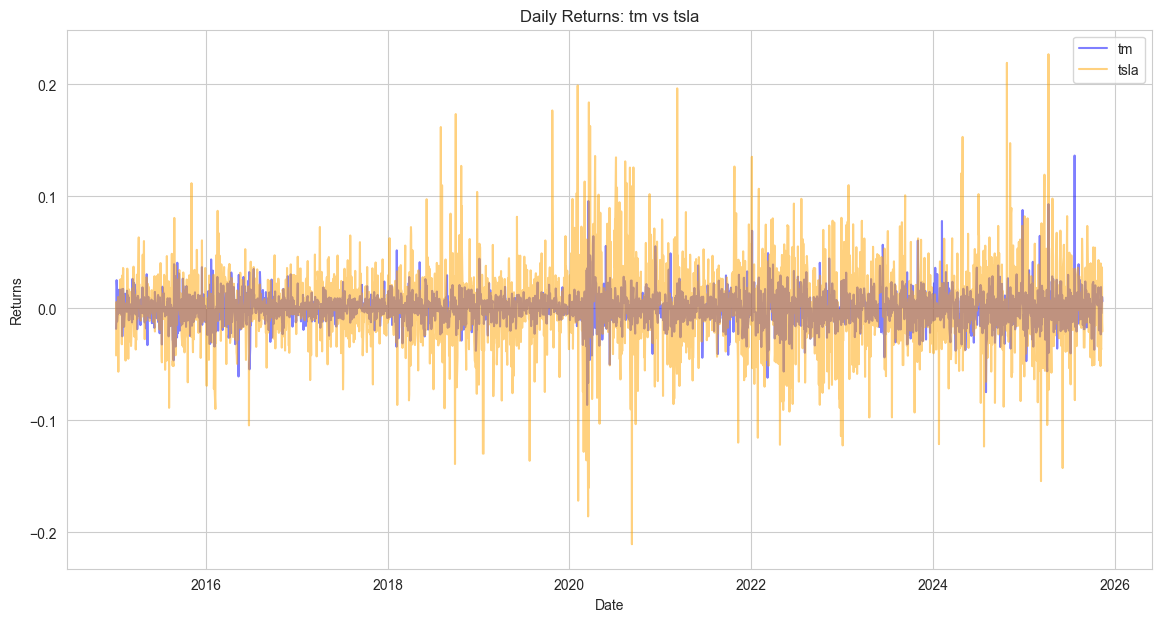

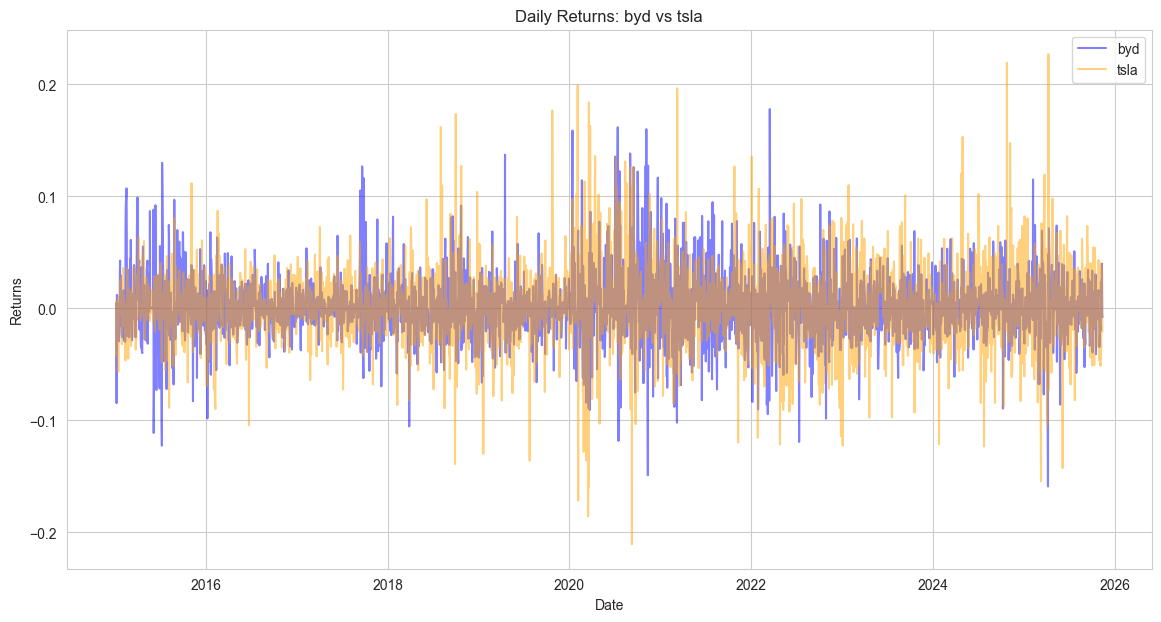

In [56]:
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    plot_return(v, name1=name1, name2='tsla', return_type='returns')

확실히 대형주(volkswagen, toyotamotors)에 비해 소형주(nio,chpt)가 return 변동폭이 큼.

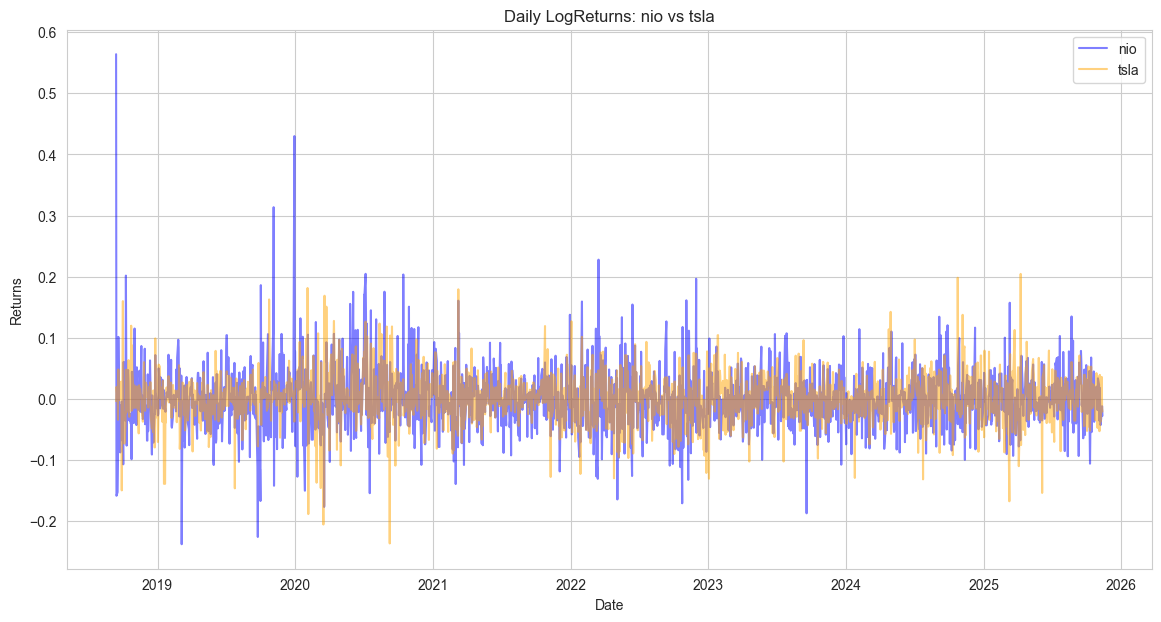

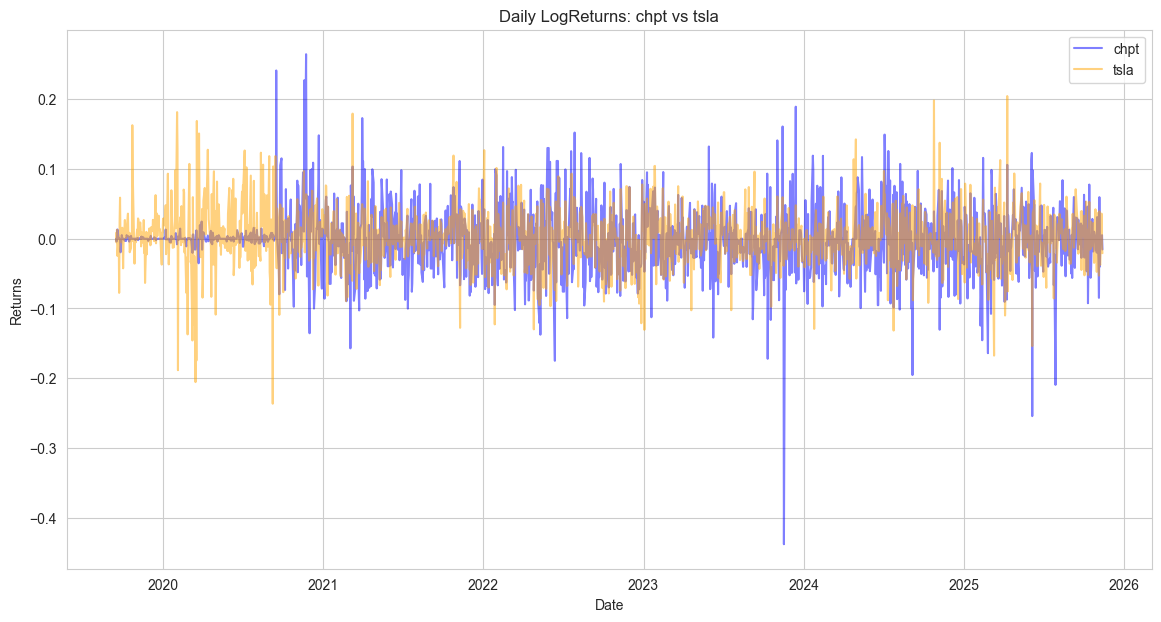

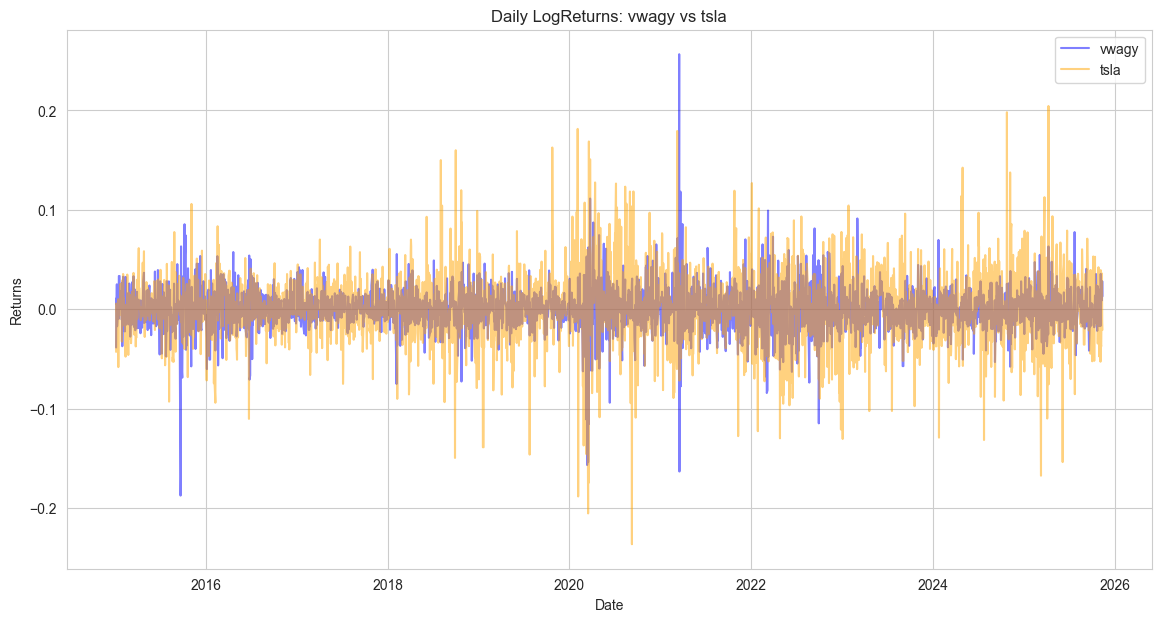

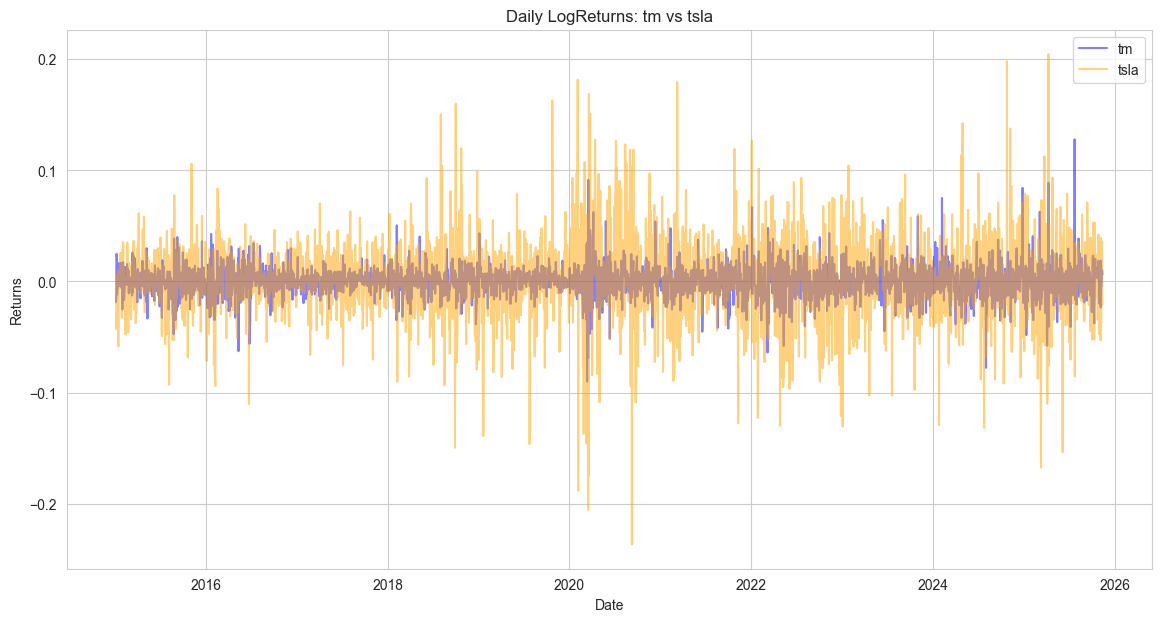

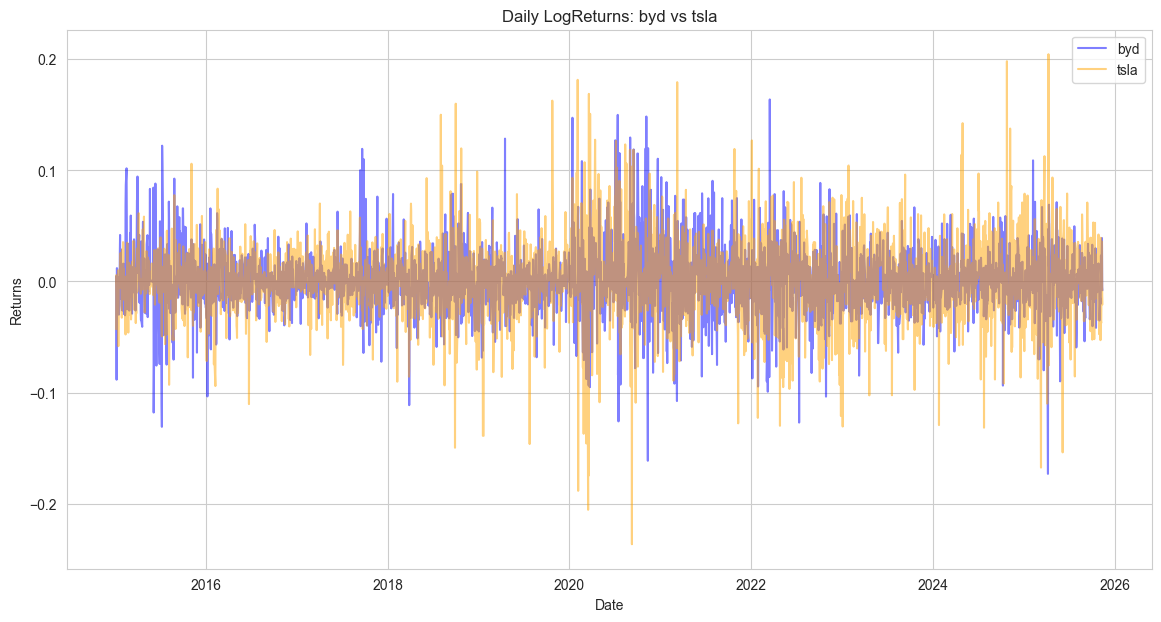

In [57]:
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    plot_return(v, name1=name1, name2='tsla', return_type='logreturns')

## 2. Correlation Analysis

In [58]:
# ...existing code...
def scatter_plot_correlation(df_merged, name1, name2='tsla', return_type='returns'):
    if return_type.lower() == 'returns':
        i = 0
        s = 'Return'
    else:
        i = 1
        s = 'Log Return'
    
    plt.figure(figsize=(6, 6))
    plt.scatter(df_merged.iloc[:, i], df_merged.iloc[:, i + 2], alpha=0.4, s=10)
    plt.title(f"Scatter Plot: {name1} - {name2} {s}")
    plt.xlabel(f'{name1} {s}')
    plt.ylabel(f'{name2} {s}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


=== NIO vs TSLA ===
Correlation between nio and tsla returns: 0.3432


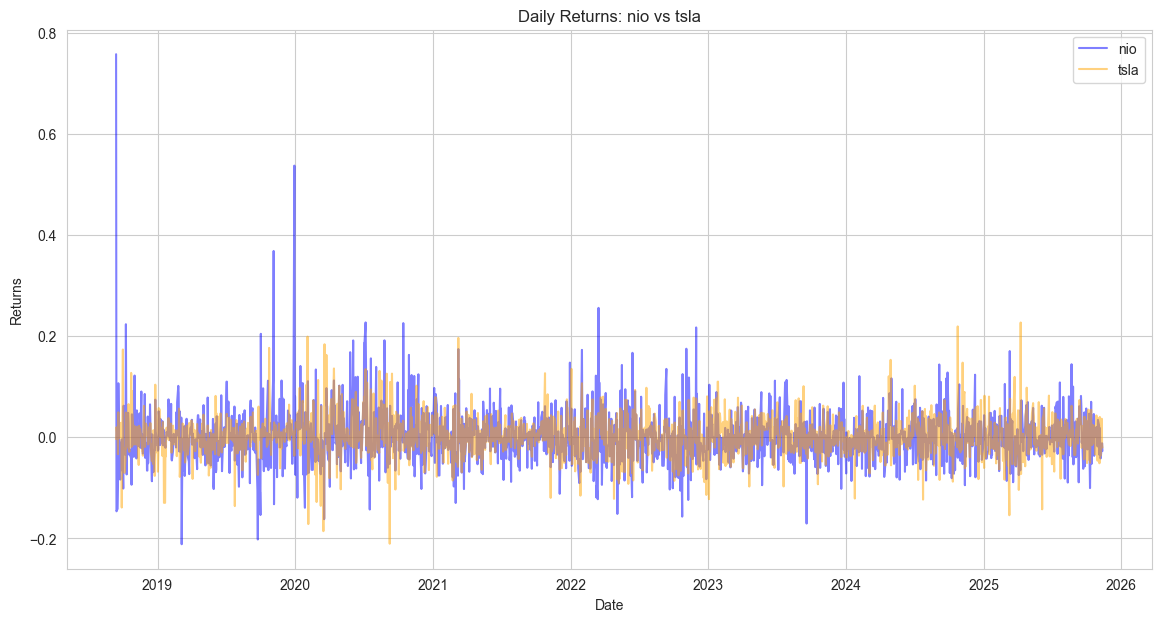


=== CHPT vs TSLA ===
Correlation between chpt and tsla returns: 0.3312


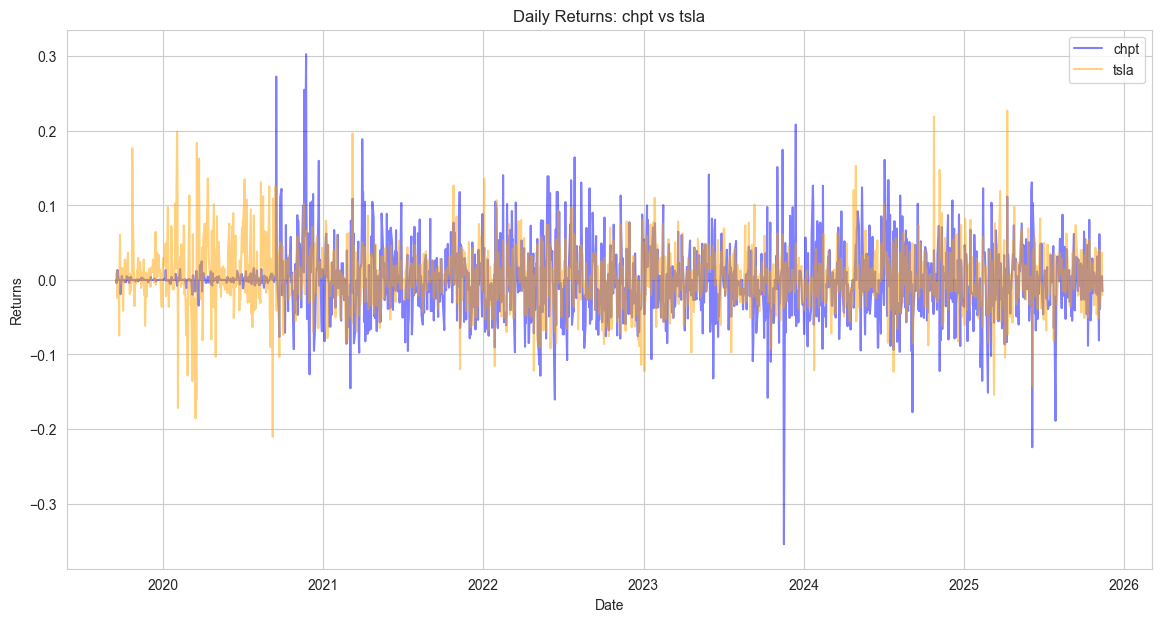


=== VWAGY vs TSLA ===
Correlation between vwagy and tsla returns: 0.2849


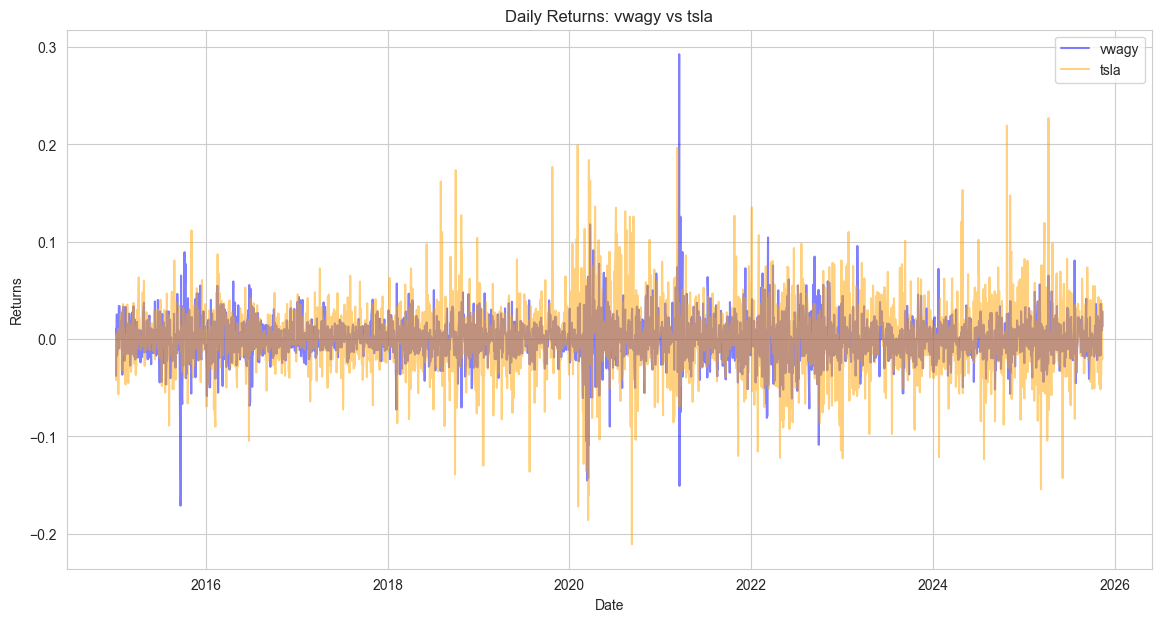


=== TM vs TSLA ===
Correlation between tm and tsla returns: 0.2626


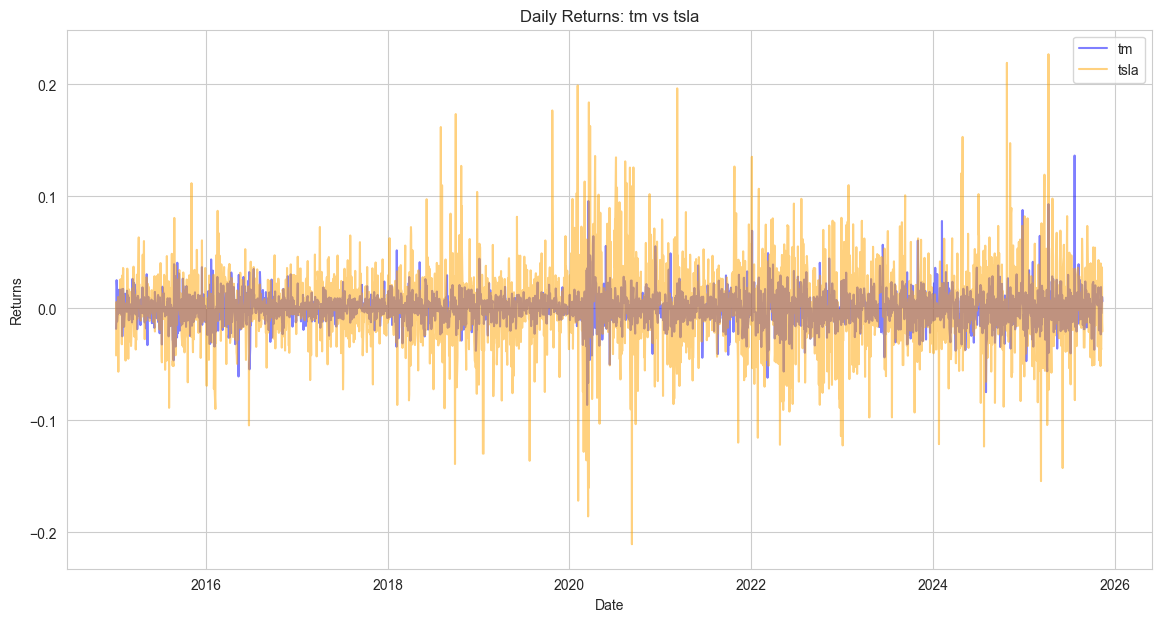


=== BYD vs TSLA ===
Correlation between byd and tsla returns: 0.1021


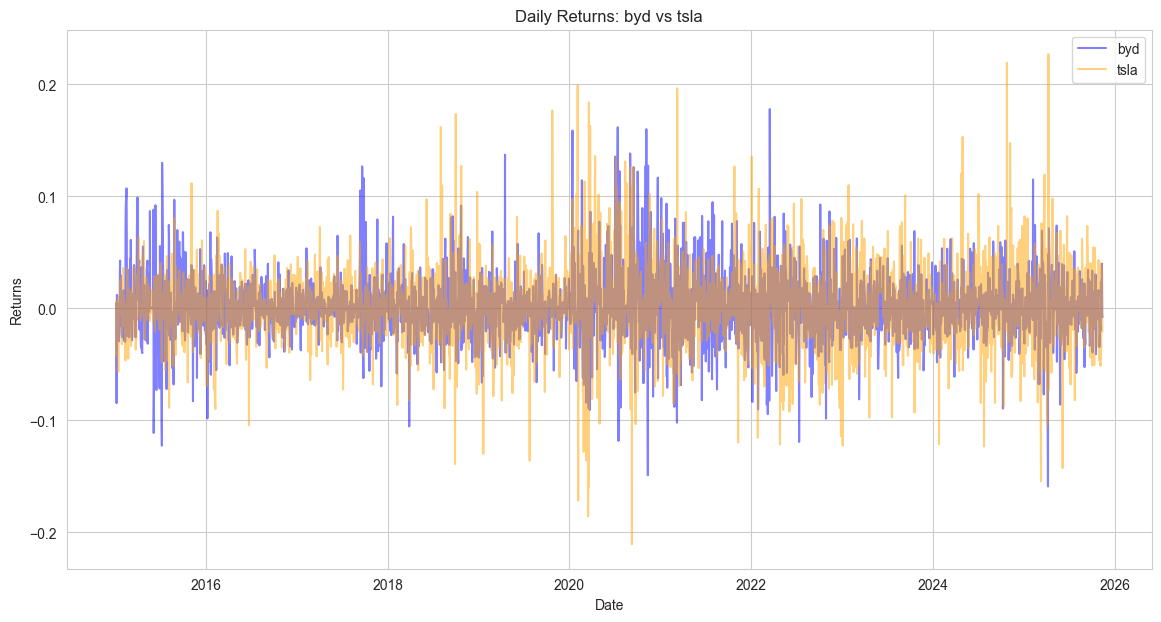

In [59]:
return_type='returns'
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    print(f"\n=== {name1.upper()} vs TSLA ===") 
    correlation = v.iloc[:, 0].corr(v.iloc[:, 2])
    print(f"Correlation between {name1} and tsla {return_type}: {correlation:.4f}") 
    plot_return(v, name1=name1, name2='tsla', return_type=return_type)


=== NIO vs TSLA ===
Correlation between nio and tsla log return: 0.3580


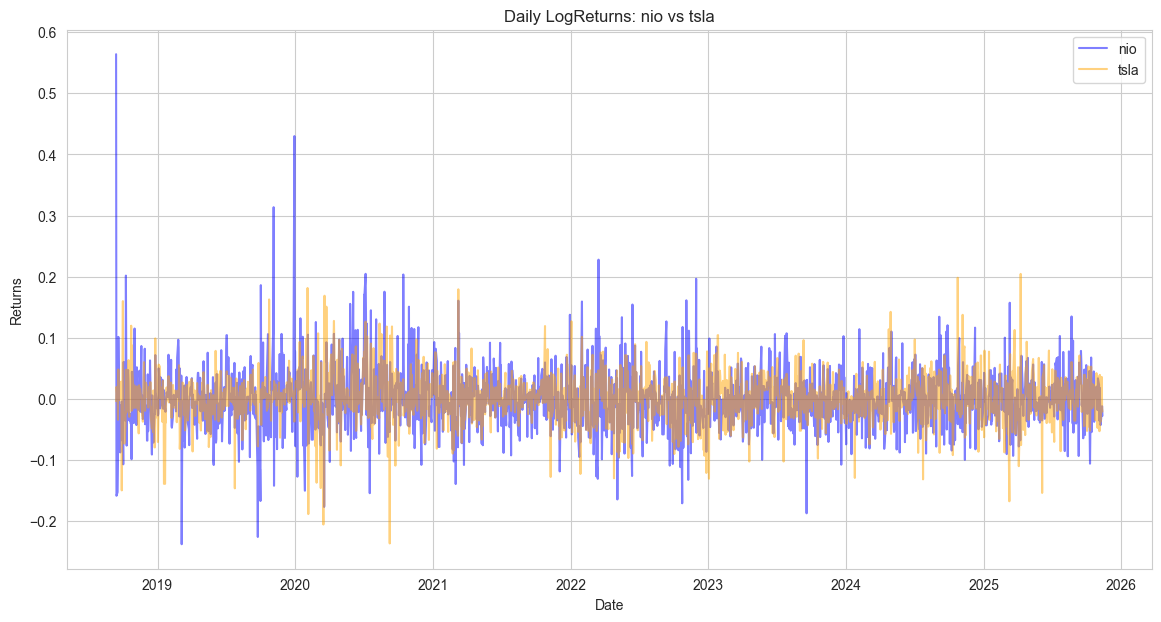


=== CHPT vs TSLA ===
Correlation between chpt and tsla log return: 0.3321


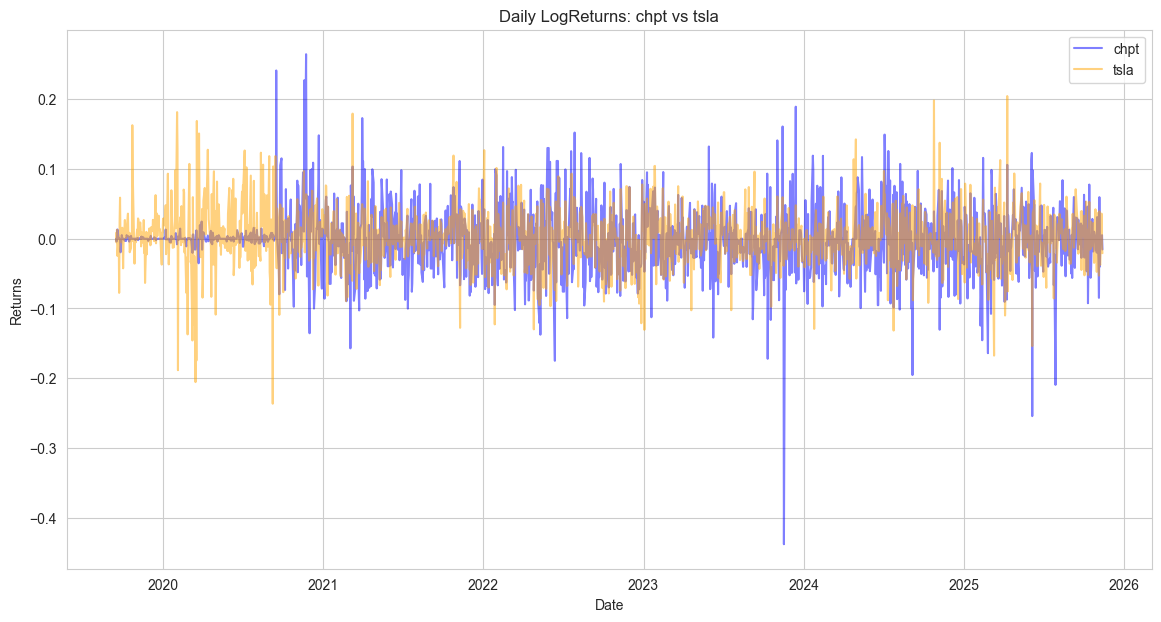


=== VWAGY vs TSLA ===
Correlation between vwagy and tsla log return: 0.2900


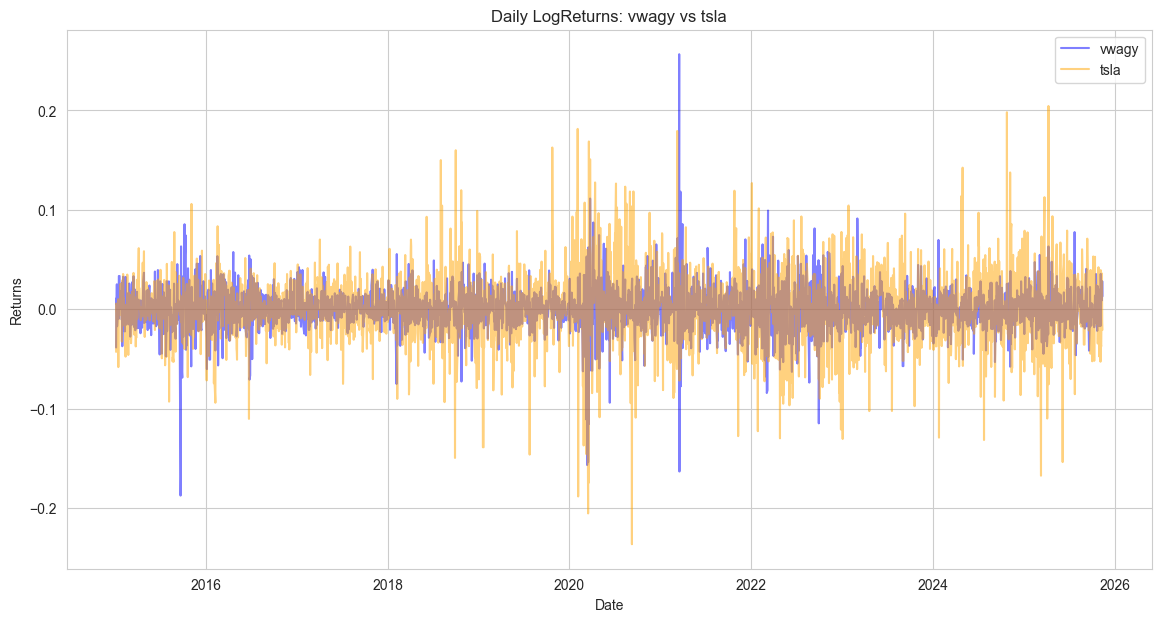


=== TM vs TSLA ===
Correlation between tm and tsla log return: 0.2656


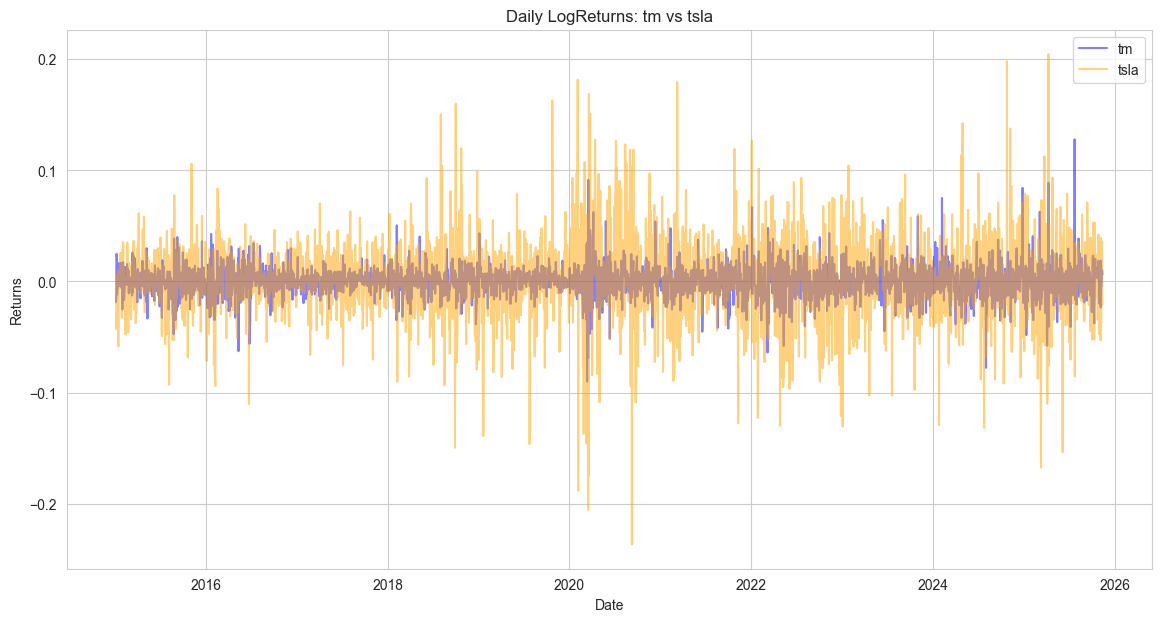


=== BYD vs TSLA ===
Correlation between byd and tsla log return: 0.1026


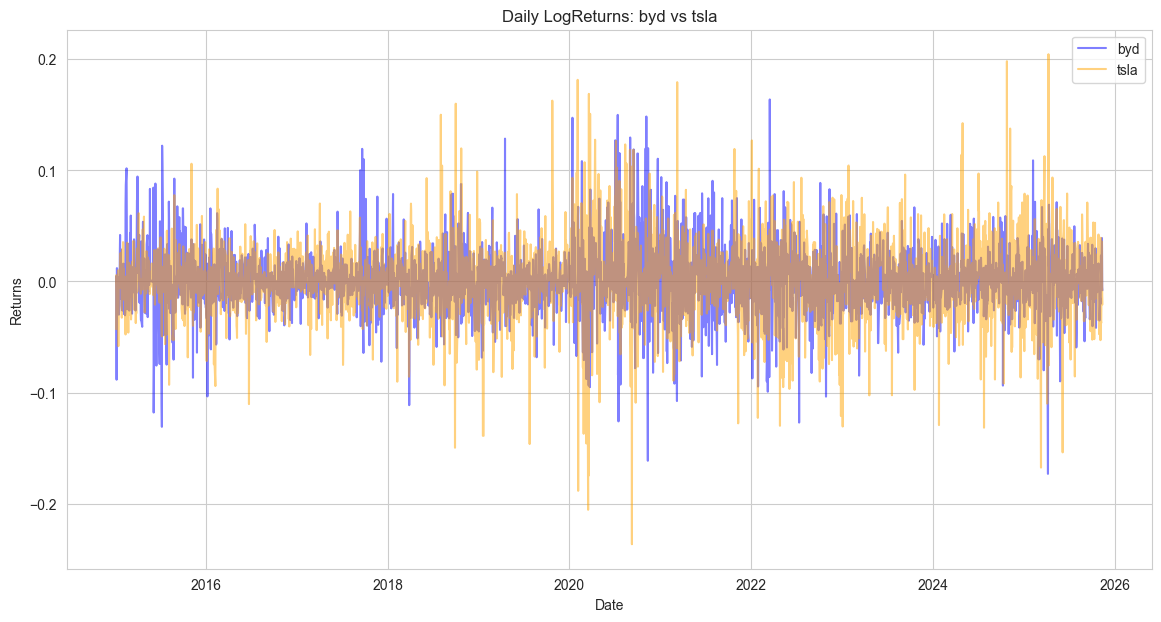

In [60]:
return_type='log return'
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    print(f"\n=== {name1.upper()} vs TSLA ===") 
    correlation = v.iloc[:, 1].corr(v.iloc[:, 3])
    print(f"Correlation between {name1} and tsla {return_type}: {correlation:.4f}") 
    plot_return(v, name1=name1, name2='tsla', return_type=return_type)

## 3. Rolling Correlation(20, 60 days)


=== NIO vs TSLA rolling_corr_20 ===
Mean rolling_corr_20: 0.38688357223478415

Top 3 Correlations:
  1. Date: 2021-03-10 00:00:00, Correlation: 0.9204
  2. Date: 2021-03-18 00:00:00, Correlation: 0.9175
  3. Date: 2021-03-19 00:00:00, Correlation: 0.9133


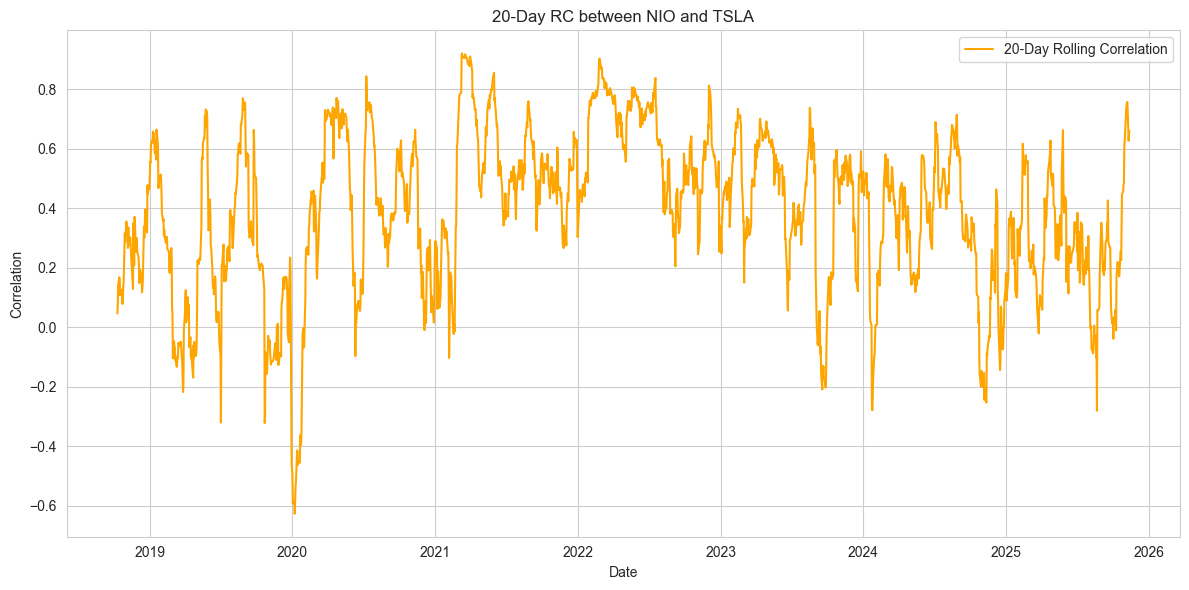


=== CHPT vs TSLA rolling_corr_20 ===
Mean rolling_corr_20: 0.35077194012318935

Top 3 Correlations:
  1. Date: 2022-11-21 00:00:00, Correlation: 0.9249
  2. Date: 2022-11-18 00:00:00, Correlation: 0.9211
  3. Date: 2022-11-17 00:00:00, Correlation: 0.9125


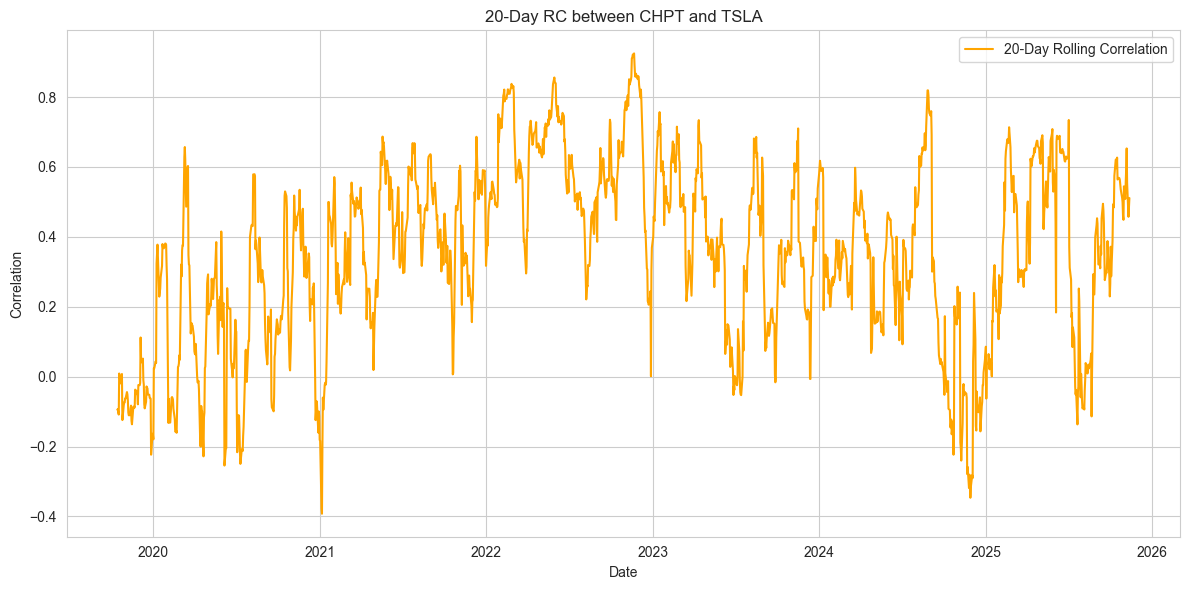


=== VWAGY vs TSLA rolling_corr_20 ===
Mean rolling_corr_20: 0.2656375108057393

Top 3 Correlations:
  1. Date: 2022-05-30 00:00:00, Correlation: 0.8328
  2. Date: 2020-04-01 00:00:00, Correlation: 0.8287
  3. Date: 2020-03-30 00:00:00, Correlation: 0.8243


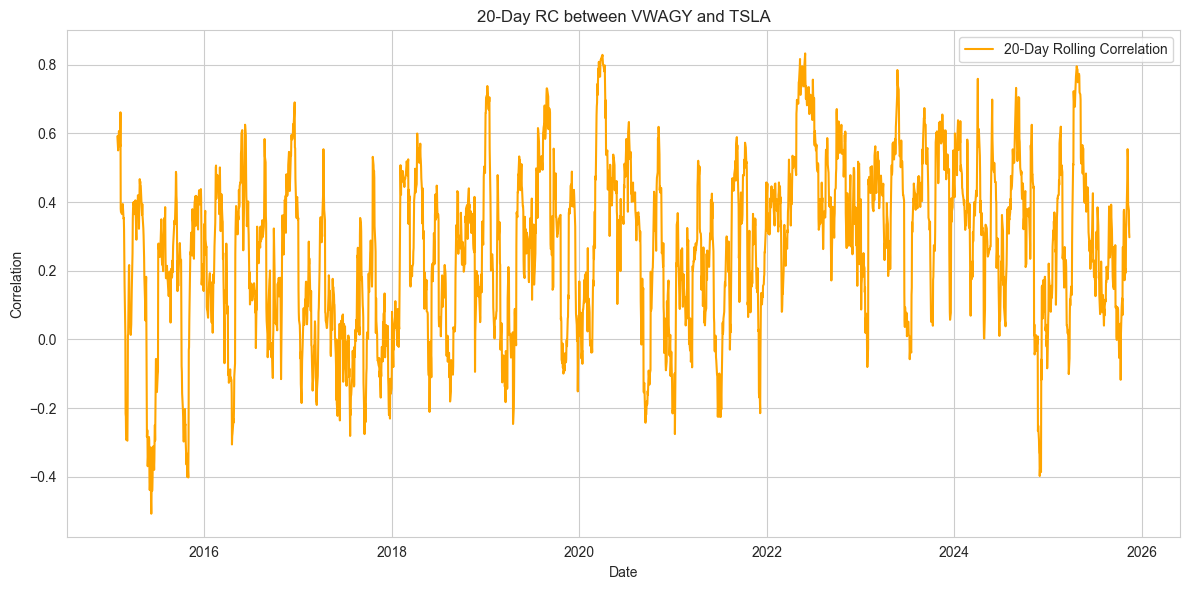


=== TM vs TSLA rolling_corr_20 ===
Mean rolling_corr_20: 0.23187827401257838

Top 3 Correlations:
  1. Date: 2025-05-01 00:00:00, Correlation: 0.8829
  2. Date: 2025-04-24 00:00:00, Correlation: 0.8790
  3. Date: 2025-05-05 00:00:00, Correlation: 0.8708


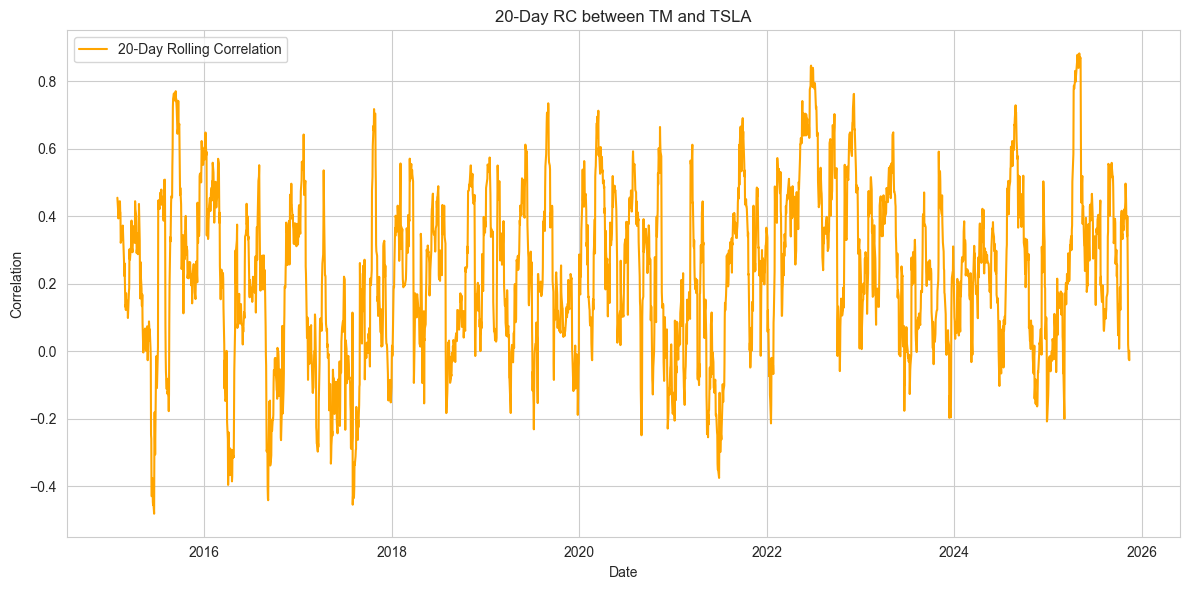


=== BYD vs TSLA rolling_corr_20 ===
Mean rolling_corr_20: 0.06763771351260559

Top 3 Correlations:
  1. Date: 2015-09-16 00:00:00, Correlation: 0.8070
  2. Date: 2015-09-15 00:00:00, Correlation: 0.7913
  3. Date: 2015-09-17 00:00:00, Correlation: 0.7789


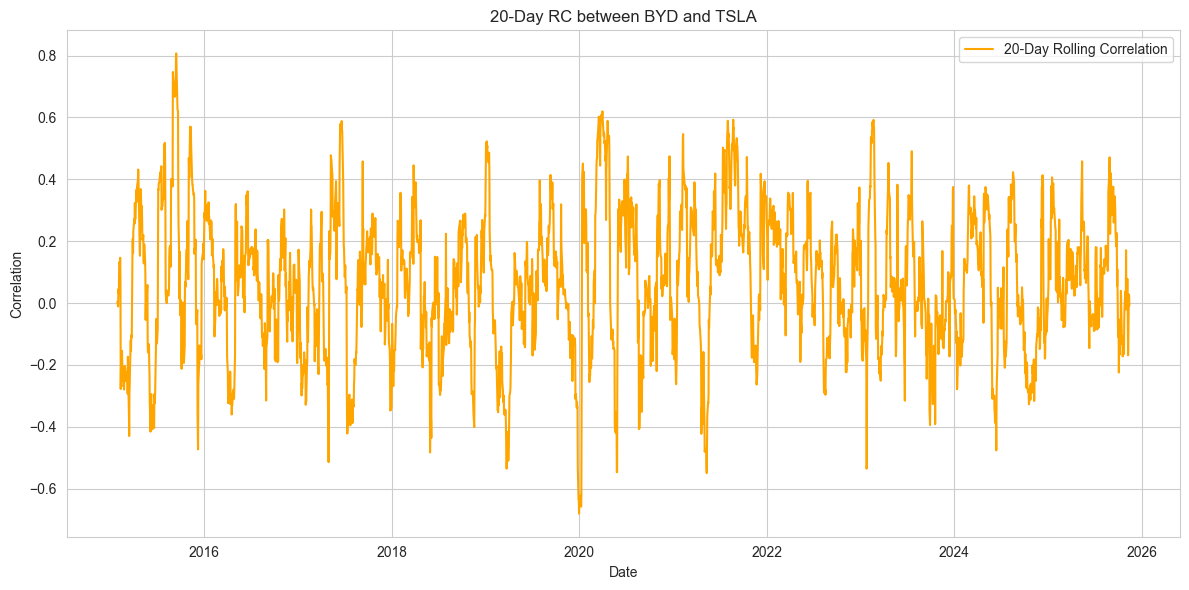

In [61]:
#Log Return - Rolling 20 correlation
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    rolling_corr_20 = v.iloc[:, 1].rolling(20).corr(v.iloc[:, 3])
    
    print(f"\n=== {name1.upper()} vs TSLA rolling_corr_20 ===") 
    print(f"Mean rolling_corr_20: {rolling_corr_20.mean()}")

    # Top 3 출력
    top_3 = rolling_corr_20.nlargest(3)
    print("\nTop 3 Correlations:")
    for idx, (date, corr) in enumerate(top_3.items(), 1):
        print(f"  {idx}. Date: {date}, Correlation: {corr:.4f}")
    
    plt.figure(figsize=(12,6))
    plt.plot(rolling_corr_20, label='20-Day Rolling Correlation', color='orange')
    plt.title(f'20-Day RC between {name1.upper()} and TSLA')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

찾아보니까 rolling correlation 높은 기간에

- 2021.3: 전세계 플러그인 EV 판매량이 동기 대비 173% 증가, 역대 2번째 월별 실적, TSLA model 3의 역대 최고 판매량

- 2022.11: global plug-in electric car sales reached a new record in november 2022(Top1: Tesla Model Y)

- 2022.5:전세계 플러그인 EV 등록이 동기 대비 55% 증가

등 EV 업계 뉴스가 존재


=== NIO vs TSLA rolling_corr_60 ===
Mean rolling_corr_60: 0.378669514596186

Top 3 Correlations:
  1. Date: 2021-05-14 00:00:00, Correlation: 0.8258
  2. Date: 2021-05-13 00:00:00, Correlation: 0.8238
  3. Date: 2021-05-10 00:00:00, Correlation: 0.8231


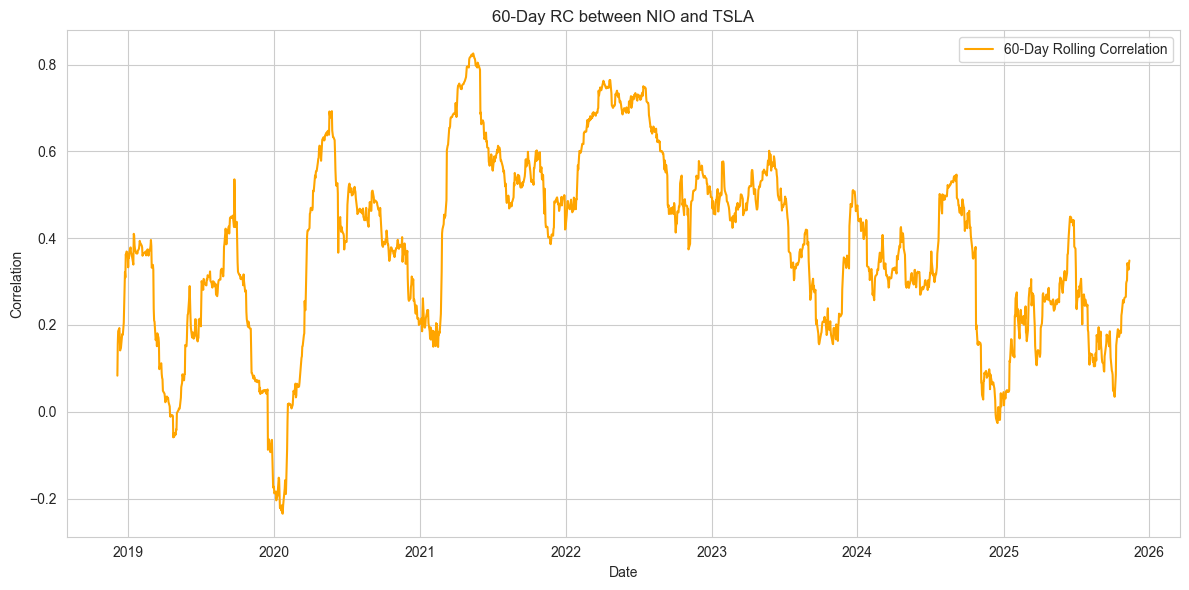


=== CHPT vs TSLA rolling_corr_60 ===
Mean rolling_corr_60: 0.34463936822553903

Top 3 Correlations:
  1. Date: 2022-05-30 00:00:00, Correlation: 0.7665
  2. Date: 2022-06-02 00:00:00, Correlation: 0.7622
  3. Date: 2022-05-31 00:00:00, Correlation: 0.7619


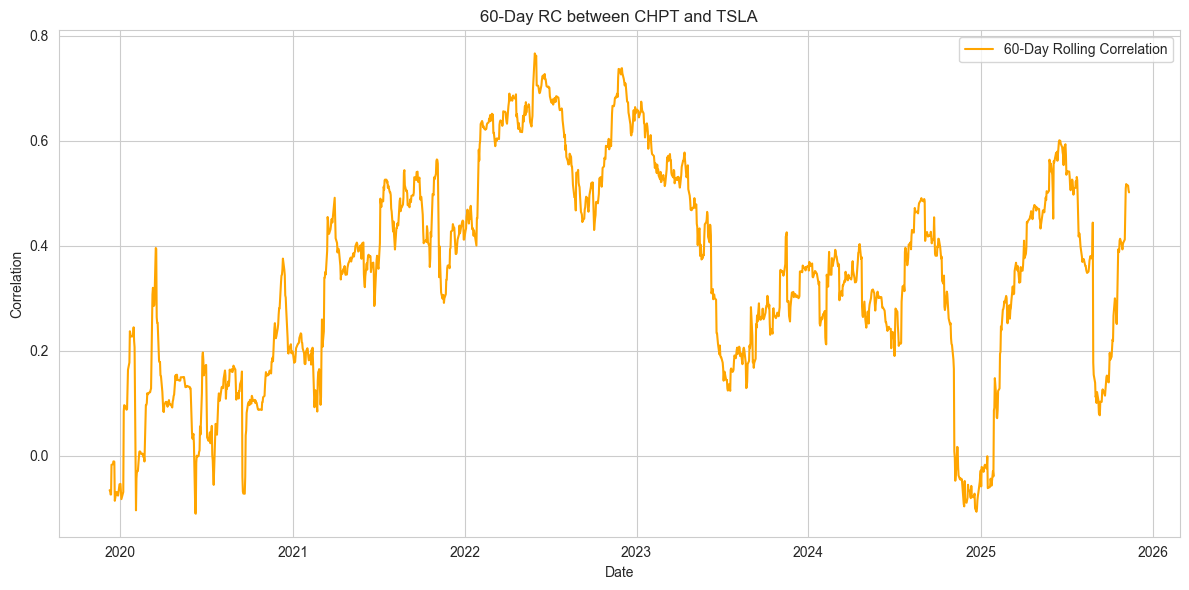


=== VWAGY vs TSLA rolling_corr_60 ===
Mean rolling_corr_60: 0.2606747542399649

Top 3 Correlations:
  1. Date: 2022-06-27 00:00:00, Correlation: 0.7203
  2. Date: 2020-05-14 00:00:00, Correlation: 0.7130
  3. Date: 2020-05-13 00:00:00, Correlation: 0.7129


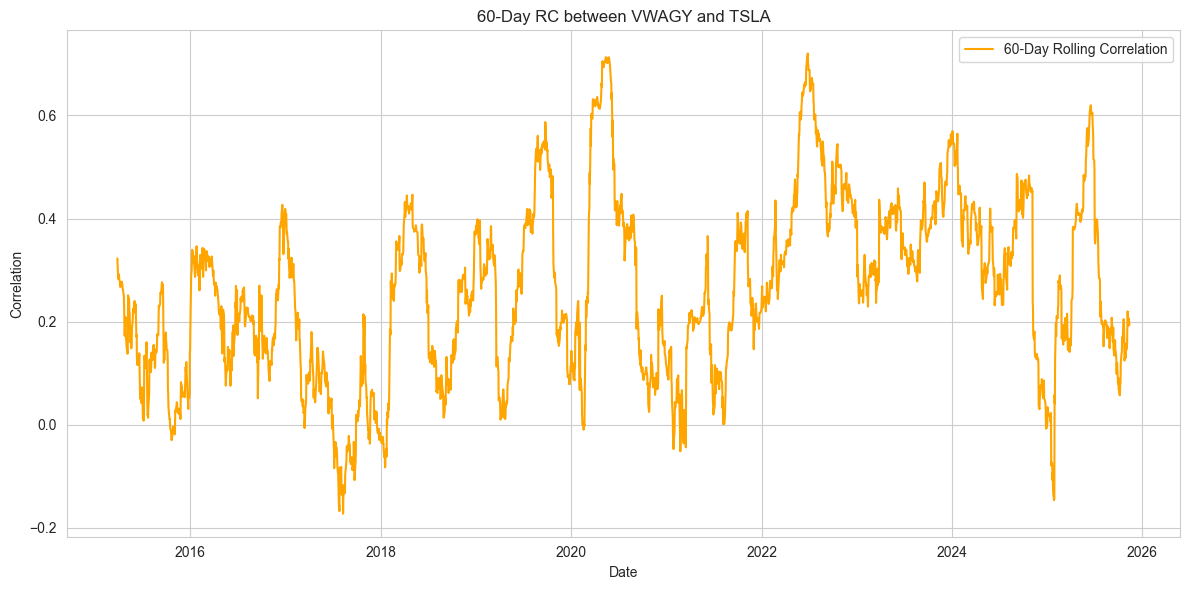


=== TM vs TSLA rolling_corr_60 ===
Mean rolling_corr_60: 0.2310766816777145

Top 3 Correlations:
  1. Date: 2022-07-18 00:00:00, Correlation: 0.7060
  2. Date: 2022-07-15 00:00:00, Correlation: 0.6995
  3. Date: 2022-07-29 00:00:00, Correlation: 0.6986


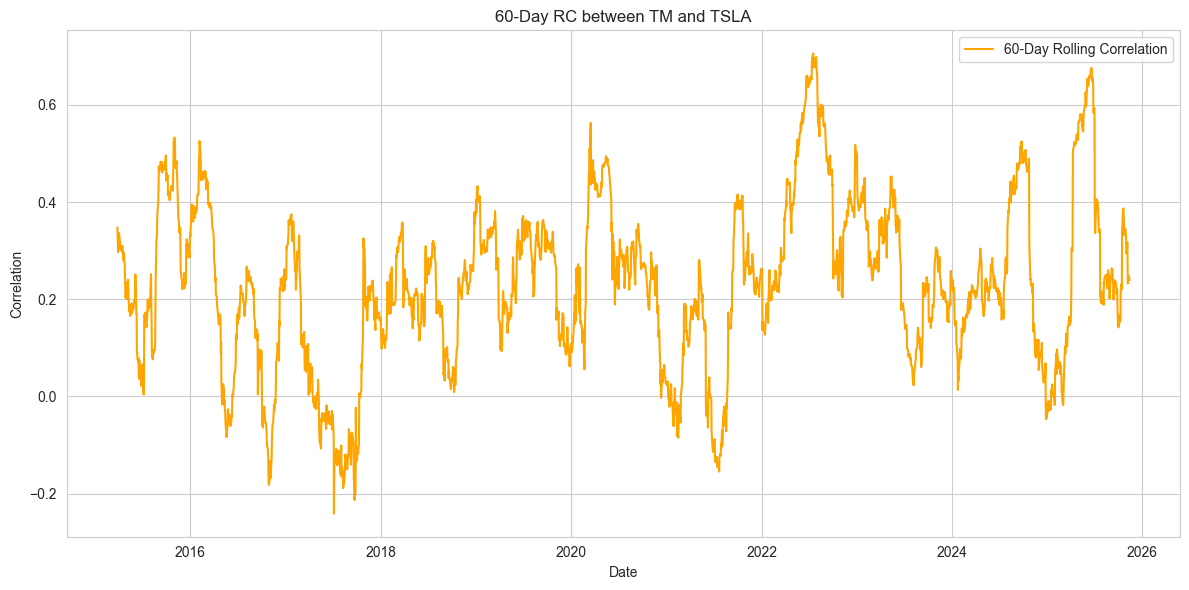


=== BYD vs TSLA rolling_corr_60 ===
Mean rolling_corr_60: 0.08574631480153182

Top 3 Correlations:
  1. Date: 2020-04-29 00:00:00, Correlation: 0.5137
  2. Date: 2020-04-30 00:00:00, Correlation: 0.4920
  3. Date: 2021-10-18 00:00:00, Correlation: 0.4617


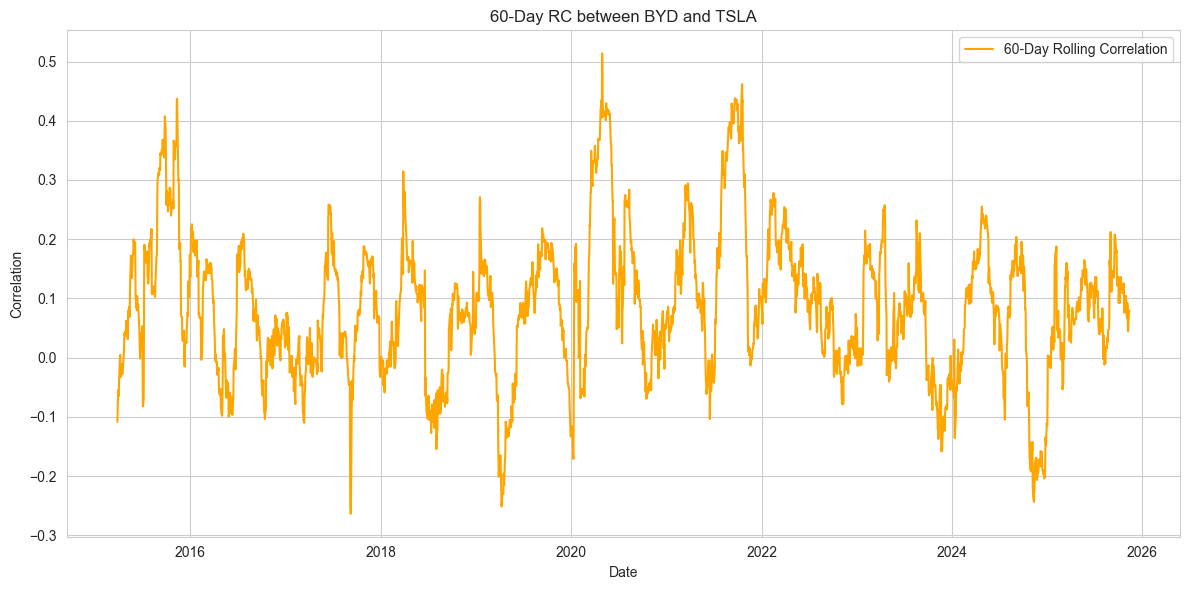

In [62]:
#Log Return - Rolling 60 correlation
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    rolling_corr_60 = v.iloc[:, 1].rolling(60).corr(v.iloc[:, 3])
    
    print(f"\n=== {name1.upper()} vs TSLA rolling_corr_60 ===") 
    print(f"Mean rolling_corr_60: {rolling_corr_60.mean()}")

    # Top 3 출력
    top_3 = rolling_corr_60.nlargest(3)
    print("\nTop 3 Correlations:")
    for idx, (date, corr) in enumerate(top_3.items(), 1):
        print(f"  {idx}. Date: {date}, Correlation: {corr:.4f}")
    
    plt.figure(figsize=(12,6))
    plt.plot(rolling_corr_60, label='60-Day Rolling Correlation', color='orange')
    plt.title(f'60-Day RC between {name1.upper()} and TSLA')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

해당 구간에 EV sector 전반적인 쇼크나 뉴스가 있었는지 확인해봐야함.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr

# 1)
def log_ccf(df_merged,name1):
    x = df_merged.iloc[:,1].dropna() #비교 stock log return
    y = df_merged.iloc[:,3].dropna() #sk hynix log return

    min_len = min(len(x), len(y))
    x = x.iloc[-min_len:]
    y = y.iloc[-min_len:]

    # 2) Positive lags
    max_lag = 60
    ccf_pos = ccf(x, y)[:max_lag+1]   # lag = 0 ~ 60

    # 3) Negative lags 
    ccf_neg = []
    for k in range(1, max_lag+1):
        corr_val = np.corrcoef(x[k:], y[:-k])[0,1]
        ccf_neg.append(corr_val)

    ccf_neg = np.array(ccf_neg[::-1])  # -60 → -1 순으로 정렬

    # 4) 전체 CCF
    full_ccf = np.concatenate([ccf_neg, ccf_pos])
    lags = np.arange(-max_lag, max_lag+1)


    # 5) Top 3 CCF + p-value 계산
    print("=== Top 3 CCF Lags, Values, and p-values ===")
    top3_idx = np.argsort(full_ccf)[-3:][::-1]
    for rank, idx in enumerate(top3_idx, 1):
        lag = lags[idx]
        ccf_val = full_ccf[idx]

        # p-value 계산
        if lag >= 0:
            # corr(x_t, y_{t+lag})
            valid_x = x[:len(x)-lag]
            valid_y = y[lag:]
        else:
            # corr(x_{t+|lag|}, y_t)
            abs_lag = abs(lag)
            valid_x = x[abs_lag:]
            valid_y = y[:len(y)-abs_lag]

        # Pearson correlation p-value
        r, pval = pearsonr(valid_x, valid_y)

        print(f"#{rank}: Lag = {lag},  CCF = {ccf_val:.4f},  p-value = {pval:.4f}")

    # 5) Plot
    plt.figure(figsize=(14,6))
    plt.bar(lags, full_ccf, width=0.8)
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f"CCF: TSLA vs {name1.upper()} (Log Returns) (Lag ±60 days)")
    plt.xlabel("Lag (days)")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 0,  CCF = 0.3580,  p-value = 0.0000
#2: Lag = -60,  CCF = 0.0781,  p-value = 0.0009
#3: Lag = 60,  CCF = 0.0757,  p-value = 0.0615


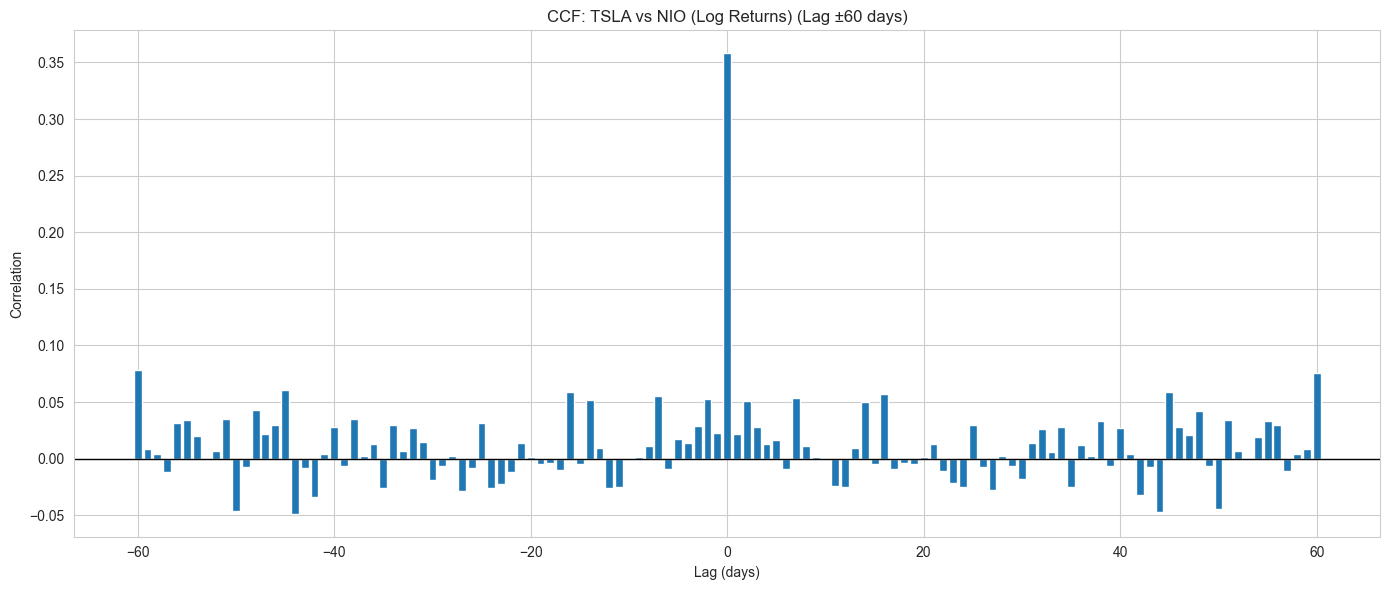

=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 0,  CCF = 0.3321,  p-value = 0.0000
#2: Lag = 48,  CCF = 0.0535,  p-value = 0.5315
#3: Lag = -48,  CCF = 0.0524,  p-value = 0.0387


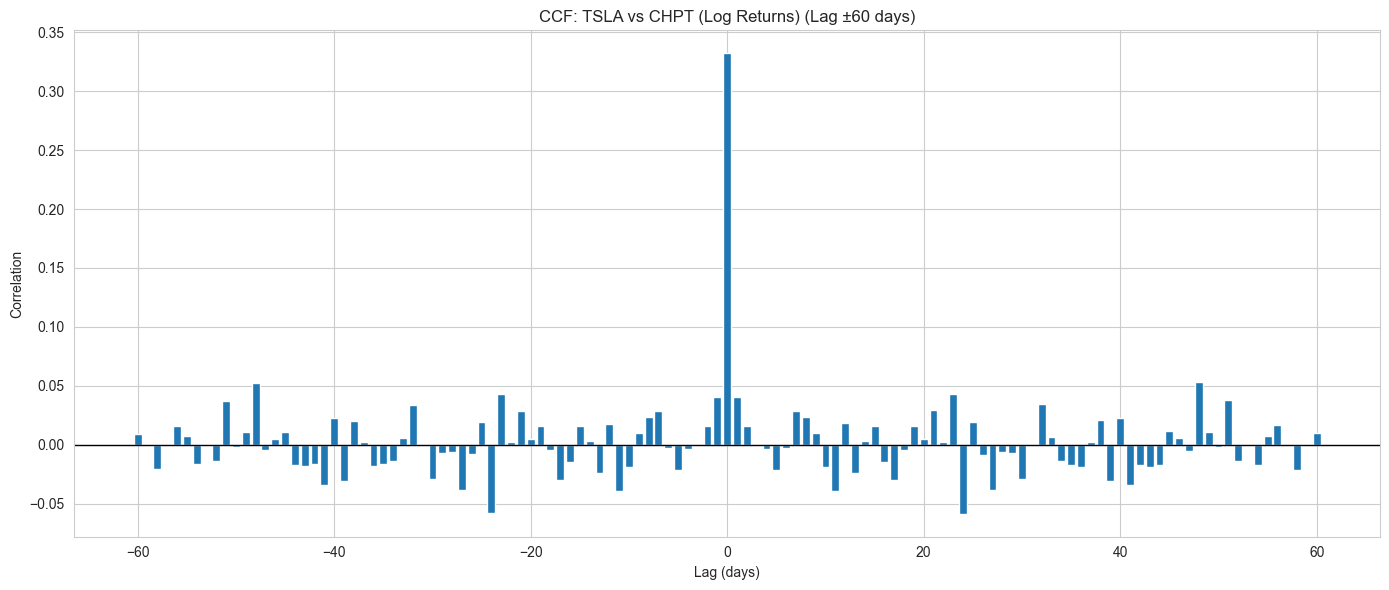

=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 0,  CCF = 0.2900,  p-value = 0.0000
#2: Lag = 9,  CCF = 0.0431,  p-value = 0.8728
#3: Lag = -9,  CCF = 0.0431,  p-value = 0.0220


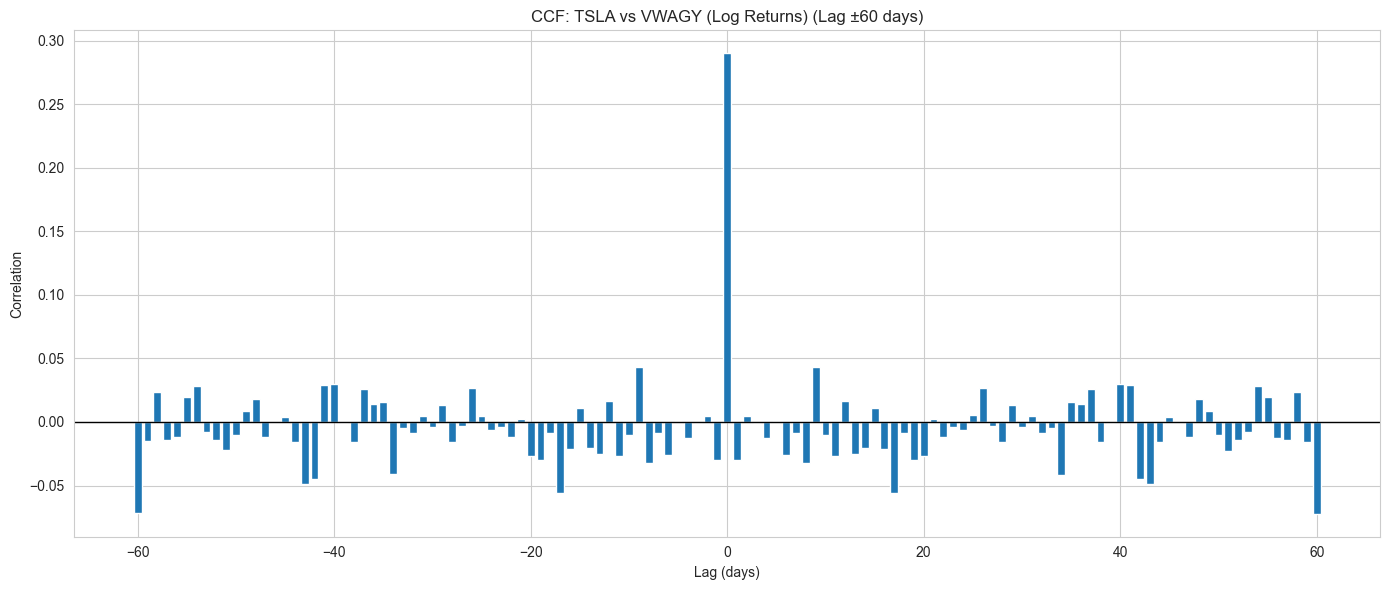

=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 0,  CCF = 0.2656,  p-value = 0.0000
#2: Lag = 41,  CCF = 0.0334,  p-value = 0.1303
#3: Lag = -41,  CCF = 0.0332,  p-value = 0.0795


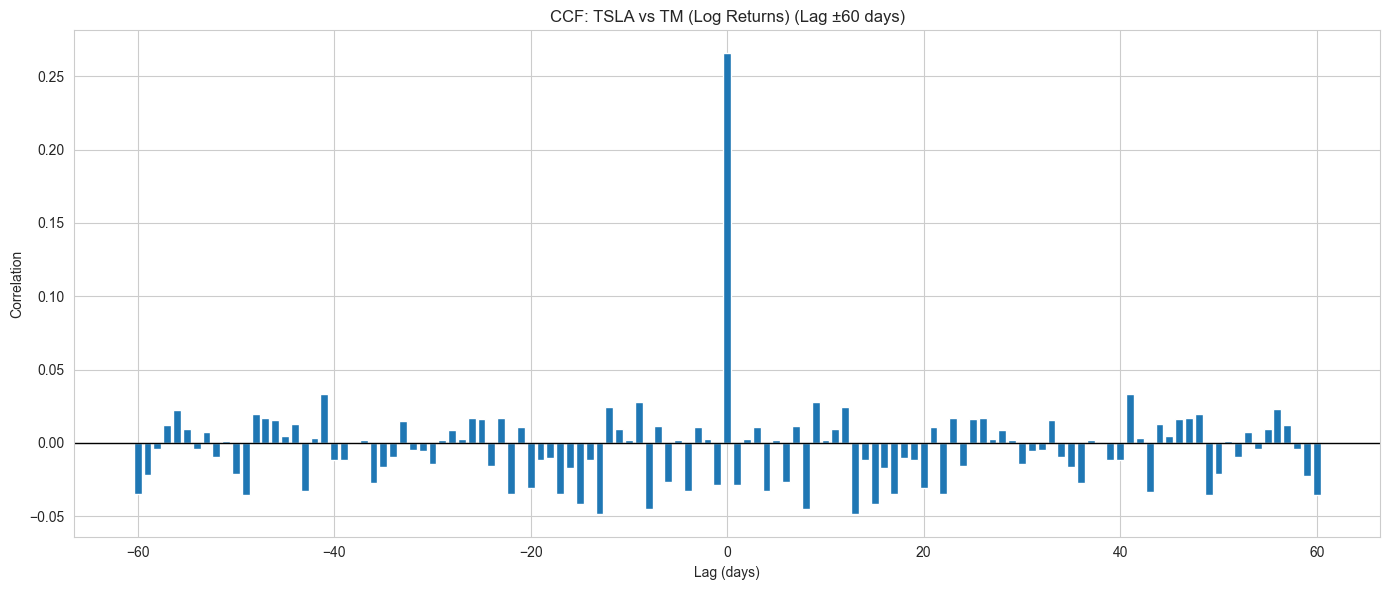

=== Top 3 CCF Lags, Values, and p-values ===
#1: Lag = 1,  CCF = 0.1978,  p-value = 0.5332
#2: Lag = -1,  CCF = 0.1977,  p-value = 0.0000
#3: Lag = 0,  CCF = 0.1026,  p-value = 0.0000


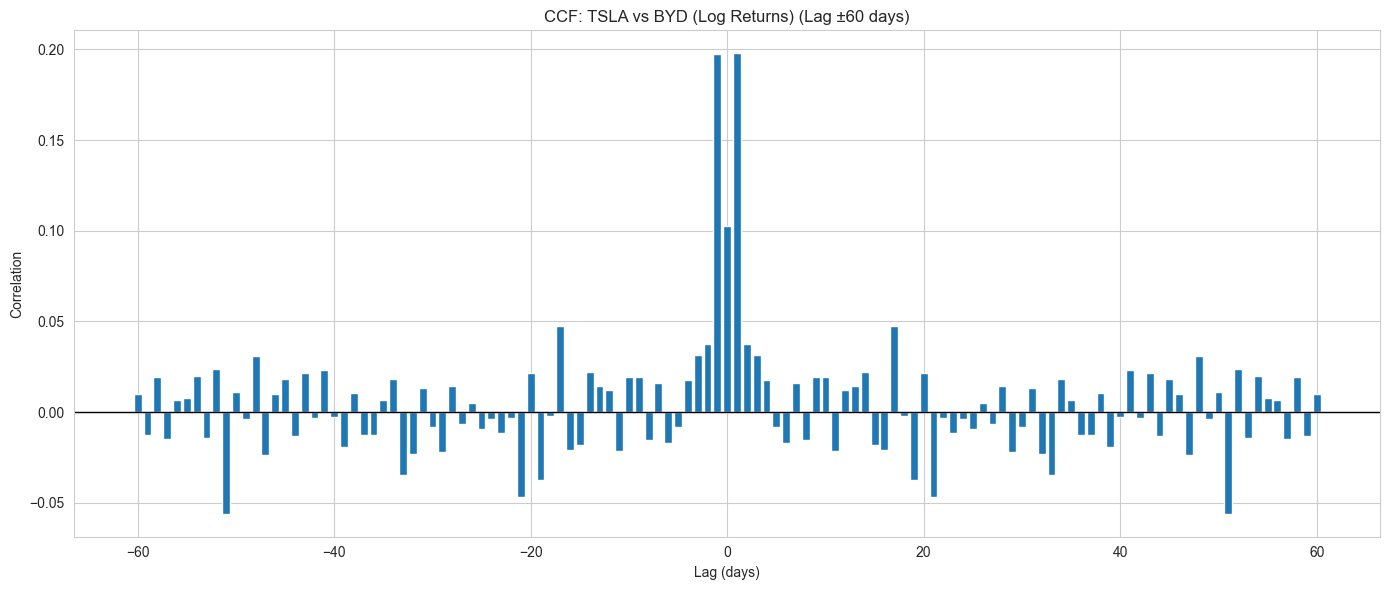

In [64]:
for k,v in merged_df.items():
    name1 = k.split('_')[0]
    log_ccf(v,name1)

## 4. Cointegration Test

In [65]:
## Cointegration Test
from statsmodels.tsa.stattools import coint, adfuller

tsla_close = tsla['Close'].dropna()

for s in stock_tickers:
    df = related.get(s)
    print(f"\n=== Cointegration Test: TSLA vs {s.upper()} ===")
    s_close = df['Close'].dropna()
    df_merged = pd.concat([tsla_close, s_close], axis=1, join='inner')
    df_merged.columns = ['tsla_close', f'{s}_close']

        # Johansen Cointegration Test
    score, pvalue, _ = coint(df_merged['tsla_close'], df_merged[f'{s}_close'])
    
    print(f"\n=== TSLA vs {s.upper()} ===")
    print(f"Cointegration Score: {score:.6f}")
    print(f"P-value: {pvalue:.6f}")
    
    if pvalue < 0.05:
        print(f"✓ 공적분 관계 존재 (p-value < 0.05)")
    else:
        print(f"✗ 공적분 관계 없음 (p-value >= 0.05)")
    


=== Cointegration Test: TSLA vs NIO ===

=== TSLA vs NIO ===
Cointegration Score: -1.023353
P-value: 0.898328
✗ 공적분 관계 없음 (p-value >= 0.05)

=== Cointegration Test: TSLA vs CHPT ===

=== TSLA vs CHPT ===
Cointegration Score: -1.866788
P-value: 0.596751
✗ 공적분 관계 없음 (p-value >= 0.05)

=== Cointegration Test: TSLA vs VWAGY ===

=== TSLA vs VWAGY ===
Cointegration Score: -1.457989
P-value: 0.776947
✗ 공적분 관계 없음 (p-value >= 0.05)

=== Cointegration Test: TSLA vs TM ===

=== TSLA vs TM ===
Cointegration Score: -3.594753
P-value: 0.024870
✓ 공적분 관계 존재 (p-value < 0.05)

=== Cointegration Test: TSLA vs BYD ===

=== TSLA vs BYD ===
Cointegration Score: -6.690863
P-value: 0.000000
✓ 공적분 관계 존재 (p-value < 0.05)


- tsla, tm/byd는 장기적 균형 관계 존재